# Step 01 - Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

In [2]:
df = pd.read_csv('./online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
objects_name = df.select_dtypes(include='object')

In [6]:
objects_name['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [7]:
objects_name['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

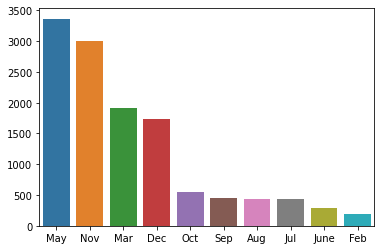

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x=objects_name['Month'].value_counts().index, y=objects_name['Month'].value_counts().values)
plt.show()

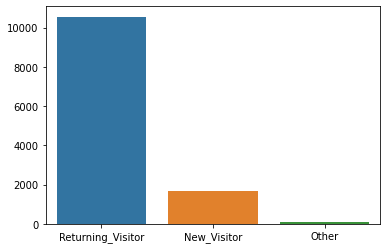

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x=objects_name['VisitorType'].value_counts().index, y=objects_name['VisitorType'].value_counts().values)
plt.show()

In [10]:
df['Weekend'] = df['Weekend'].apply(lambda x: int(x))
df['Revenue'] = df['Revenue'].apply(lambda x: int(x))

In [11]:
month_dict = {
    'May':0, 'Nov':1, 'Mar':2, 'Dec':3, 'Oct':4, 'Sep':5, 'Aug':6, 'Jul':7, 'June':8, 'Feb':9
}

df['Month'] = df['Month'].map(month_dict)

In [12]:
visitor_dict = {
    'Returning_Visitor':1, 'New_Visitor':2, 'Other':0
}

df['VisitorType'] = df['VisitorType'].map(visitor_dict)

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,9,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,9,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,9,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,9,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,9,3,3,1,4,1,1,0


In [14]:
df.shape

(12330, 18)

In [15]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.109570,2.124006,2.357097,3.147364,4.069586,1.130495,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.231129,0.911325,1.717277,2.401591,4.025169,0.356740,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


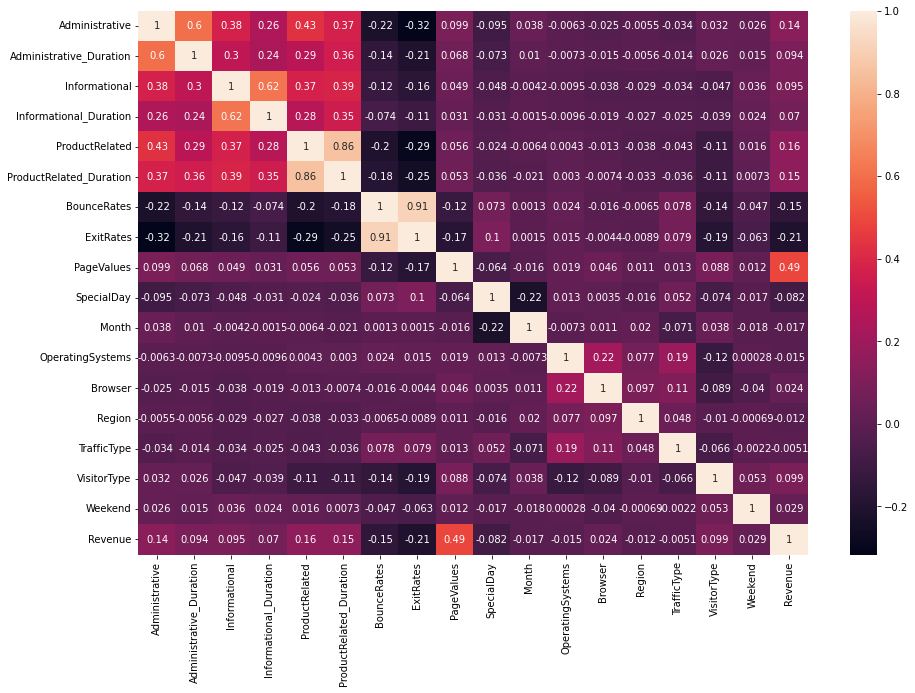

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
shop = df.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis=1).copy()

In [18]:
shop.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,9,1,1,1,1,1,0,0
1,0.0,0.0,2,0.00,0.10,0.0,0.0,9,2,2,1,2,1,0,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,9,4,1,9,3,1,0,0
3,0.0,0.0,2,0.05,0.14,0.0,0.0,9,3,2,2,4,1,0,0
4,0.0,0.0,10,0.02,0.05,0.0,0.0,9,3,3,1,4,1,1,0


In [19]:
shop = pd.get_dummies(data=shop, columns=['VisitorType'], drop_first=True)

In [20]:
x = shop.drop('Revenue', axis=1)
y = shop['Revenue'].values

In [21]:
x.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_1,VisitorType_2
0,0.0,0.0,1,0.20,0.20,0.0,0.0,9,1,1,1,1,0,1,0
1,0.0,0.0,2,0.00,0.10,0.0,0.0,9,2,2,1,2,0,1,0
2,0.0,0.0,1,0.20,0.20,0.0,0.0,9,4,1,9,3,0,1,0
3,0.0,0.0,2,0.05,0.14,0.0,0.0,9,3,2,2,4,0,1,0
4,0.0,0.0,10,0.02,0.05,0.0,0.0,9,3,3,1,4,1,1,0


In [22]:
# scaler = StandardScaler().fit(x)
# x = scaler.transform(x)

In [23]:
# splitting the data into training, testing and validation datasets

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [24]:
x_train = x_train_full[2000:]
x_val = x_train_full[:2000]

y_train = y_train_full[2000:]
y_val = y_train_full[:2000]

In [25]:
x_train.shape, x_val.shape

((7864, 15), (2000, 15))

In [26]:
# building the model

model = keras.Sequential()

In [27]:
model.add(keras.layers.Dense(units=18, activation='relu', input_shape=(15,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:
# compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# training the model

history = model.fit(x_train, y_train, epochs=10, verbose=2, validation_data=(x_val, y_val))

Epoch 1/10
246/246 - 2s - loss: 0.5291 - accuracy: 0.7796 - val_loss: 0.4106 - val_accuracy: 0.8355 - 2s/epoch - 7ms/step
Epoch 2/10
246/246 - 1s - loss: 0.4078 - accuracy: 0.8470 - val_loss: 0.3700 - val_accuracy: 0.8360 - 549ms/epoch - 2ms/step
Epoch 3/10
246/246 - 1s - loss: 0.3727 - accuracy: 0.8533 - val_loss: 0.3307 - val_accuracy: 0.8480 - 625ms/epoch - 3ms/step
Epoch 4/10
246/246 - 1s - loss: 0.3515 - accuracy: 0.8610 - val_loss: 0.3194 - val_accuracy: 0.8620 - 531ms/epoch - 2ms/step
Epoch 5/10
246/246 - 1s - loss: 0.3273 - accuracy: 0.8727 - val_loss: 0.3133 - val_accuracy: 0.8735 - 905ms/epoch - 4ms/step
Epoch 6/10
246/246 - 1s - loss: 0.3309 - accuracy: 0.8708 - val_loss: 0.3083 - val_accuracy: 0.8745 - 978ms/epoch - 4ms/step
Epoch 7/10
246/246 - 1s - loss: 0.3195 - accuracy: 0.8727 - val_loss: 0.3017 - val_accuracy: 0.8760 - 1s/epoch - 4ms/step
Epoch 8/10
246/246 - 1s - loss: 0.3191 - accuracy: 0.8759 - val_loss: 0.2997 - val_accuracy: 0.8740 - 962ms/epoch - 4ms/step
Epoch 

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred = np.where(y_pred> 0.5, 1, 0)

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.8811841038118411

In [33]:
model.save('model')